# Digit Recognition: Multiclass Classification
Multiclass Classification with Logistic Regression implementation for solving Digit Recognition Problem

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn

### Load Data

In [4]:
digits = load_digits()

### Inspect Data

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
print(digits['data'][0])
print(len(digits.data))

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
1797


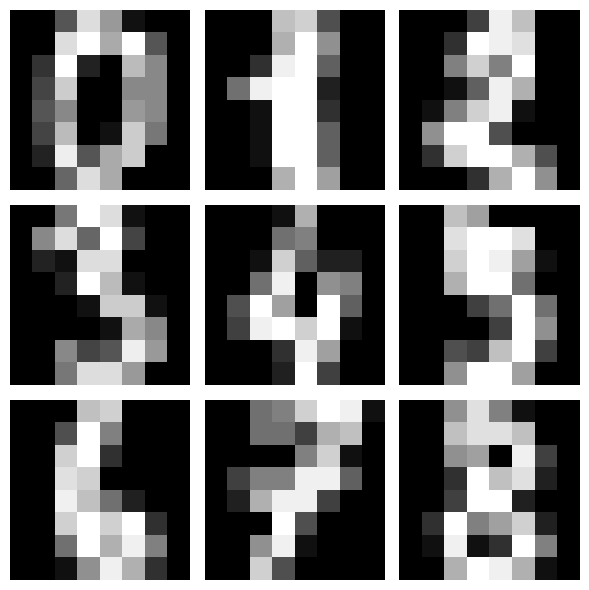

In [7]:
# Create a 2x3 grid for subplots
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Show 6 images in the subplots
for i in range(9):
    axes[i].imshow(digits['images'][i], cmap='gray')
    axes[i].axis('off')  # Turn off axis labels and ticks

plt.tight_layout()
plt.show()

### Split Data

In [8]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train Model and Test Score

In [9]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
accuracy = lg_model.score(X_test, y_test) * 100
print(str(accuracy), "%")

95.0 %


/home/abrar/.miniconda/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Demonstration of predictions

Label: 1
Prediction: [1]


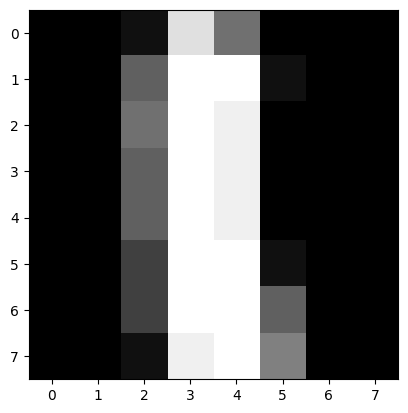

In [10]:
plt.imshow(digits.images[349], cmap='gray')
print(f'Label: {digits.target[349]}')
print(f'Prediction: {lg_model.predict([digits.data[349]])}')

Label: 0
Prediction: [0]


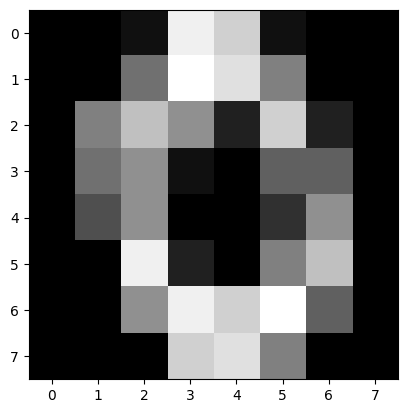

In [11]:
plt.imshow(digits.images[49], cmap='gray')
print(f'Label: {digits.target[49]}')
print(f'Prediction: {lg_model.predict([digits.data[49]])}')

Label: 3
Prediction: [3]


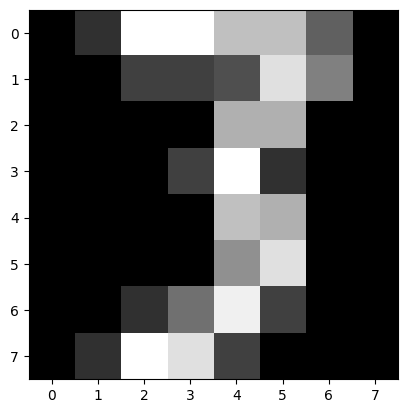

In [12]:
plt.imshow(digits.images[133], cmap='gray')
print(f'Label: {digits.target[133]}')
print(f'Prediction: {lg_model.predict([digits.data[133]])}')

## Confusion Matrices

In [13]:
y_predicted = lg_model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[33,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  2, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  1],
       [ 0,  5,  0,  0,  1,  0,  0,  0, 34,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  3, 29]])

Text(95.72222222222221, 0.5, 'Truth')

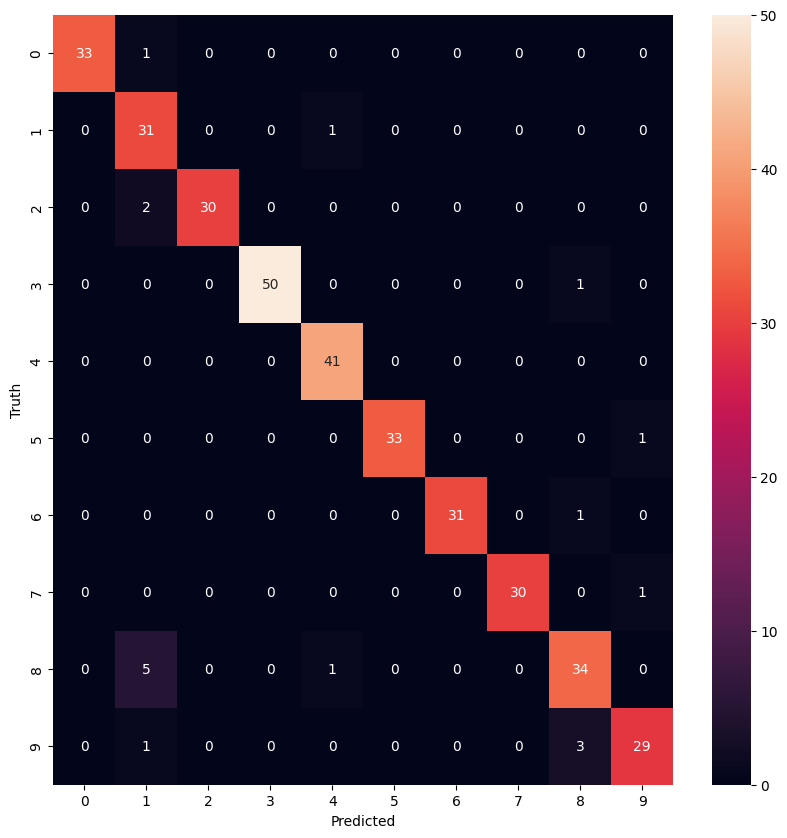

In [15]:
plt.figure(figsize=(10, 10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')